<a href="https://colab.research.google.com/github/MarioBolanos/AnalisisNumerico/blob/master/5_MachineLearning/ANN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import OrderedDict

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))



TensorFlow version: 2.6.0
Eager execution: True


In [ ]:
xdata = [0., 0., 1., 1., .5, .4,   0.1, 0.1, 1.1, 1.1, .6, .5,    0., 0., 1., 1., .5, .4,   0.1, 0.1, 1.1, 1.1, .6, .5]
ydata = [0., 1., 0., 1., .6, .8,   0. , 1.,  0,   1.,  .6, .8,    0.1, 1.1, 0.1, 1.1, .7, .9,   0.1, 1.1, 0.1, 1.1, .7, .9]
# outputdata = [0,1,1,0,1,0,  0,1,1,0,1,0,          0,1,1,0,1,0,            0,1,1,0,1,0]
outputdata = [0,1,1,0,2,2,  0,1,1,0,2,2,          0,1,1,0,2,2,            0,1,1,0,2,2]
dataset = tf.data.Dataset.from_tensor_slices(OrderedDict(
    {'x': xdata,
     'y': ydata,
     'output': outputdata}))
 
list(dataset.as_numpy_iterator())[:]

[OrderedDict([('x', 0.0), ('y', 0.0), ('output', 0)]),
 OrderedDict([('x', 0.0), ('y', 1.0), ('output', 1)]),
 OrderedDict([('x', 1.0), ('y', 0.0), ('output', 1)]),
 OrderedDict([('x', 1.0), ('y', 1.0), ('output', 0)]),
 OrderedDict([('x', 0.5), ('y', 0.6), ('output', 2)]),
 OrderedDict([('x', 0.4), ('y', 0.8), ('output', 2)]),
 OrderedDict([('x', 0.1), ('y', 0.0), ('output', 0)]),
 OrderedDict([('x', 0.1), ('y', 1.0), ('output', 1)]),
 OrderedDict([('x', 1.1), ('y', 0.0), ('output', 1)]),
 OrderedDict([('x', 1.1), ('y', 1.0), ('output', 0)]),
 OrderedDict([('x', 0.6), ('y', 0.6), ('output', 2)]),
 OrderedDict([('x', 0.5), ('y', 0.8), ('output', 2)]),
 OrderedDict([('x', 0.0), ('y', 0.1), ('output', 0)]),
 OrderedDict([('x', 0.0), ('y', 1.1), ('output', 1)]),
 OrderedDict([('x', 1.0), ('y', 0.1), ('output', 1)]),
 OrderedDict([('x', 1.0), ('y', 1.1), ('output', 0)]),
 OrderedDict([('x', 0.5), ('y', 0.7), ('output', 2)]),
 OrderedDict([('x', 0.4), ('y', 0.9), ('output', 2)]),
 OrderedDi

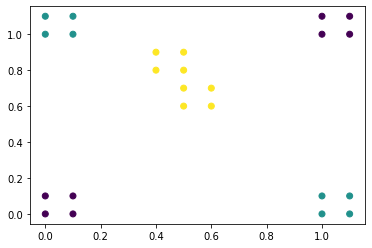

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(xdata,ydata,c=outputdata,cmap='viridis')

# for element in dataset:
#  print(element['x'].numpy(),element['y'].numpy(),
#        element['output'].numpy())
#  plt.scatter(element['x'].numpy(),element['y'].numpy(),
#            c=element['output'].numpy(),cmap='viridis')


In [ ]:
train_dataset = dataset.batch(6)

list(train_dataset.as_numpy_iterator())[:]

[OrderedDict([('x', array([0. , 0. , 1. , 1. , 0.5, 0.4], dtype=float32)),
              ('y', array([0. , 1. , 0. , 1. , 0.6, 0.8], dtype=float32)),
              ('output', array([0, 1, 1, 0, 2, 2], dtype=int32))]),
 OrderedDict([('x', array([0.1, 0.1, 1.1, 1.1, 0.6, 0.5], dtype=float32)),
              ('y', array([0. , 1. , 0. , 1. , 0.6, 0.8], dtype=float32)),
              ('output', array([0, 1, 1, 0, 2, 2], dtype=int32))]),
 OrderedDict([('x', array([0. , 0. , 1. , 1. , 0.5, 0.4], dtype=float32)),
              ('y', array([0.1, 1.1, 0.1, 1.1, 0.7, 0.9], dtype=float32)),
              ('output', array([0, 1, 1, 0, 2, 2], dtype=int32))]),
 OrderedDict([('x', array([0.1, 0.1, 1.1, 1.1, 0.6, 0.5], dtype=float32)),
              ('y', array([0.1, 1.1, 0.1, 1.1, 0.7, 0.9], dtype=float32)),
              ('output', array([0, 1, 1, 0, 2, 2], dtype=int32))])]

In [ ]:
# xdata=list(train_dataset.as_numpy_iterator())[0]['x']
# ydata=list(train_dataset.as_numpy_iterator())[0]['y']
# features=tf.stack([xdata,ydata],axis=1)
# print(features)
# labels=tf.constant(list(train_dataset.as_numpy_iterator())[0]['output'].transpose())
# print(labels)

In [ ]:
batch_data = next(iter(train_dataset))
# print(batch_data['x'])
# print(batch_data['y'])
# print(batch_data['output'])
features = tf.stack( [batch_data['x'],batch_data['y']],axis=1)
labels = batch_data['output']
print(features)
print(labels)

tf.Tensor(
[[0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]
 [0.5 0.6]
 [0.4 0.8]], shape=(6, 2), dtype=float32)
tf.Tensor([0 1 1 0 2 2], shape=(6,), dtype=int32)


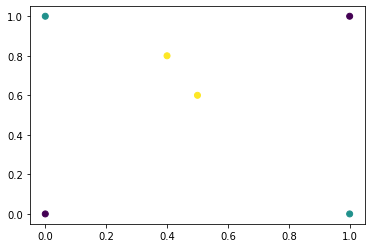

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(batch_data['x'],batch_data['y'],c=batch_data['output'], cmap='viridis')



In [ ]:
print(features)

tf.Tensor(
[[0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]
 [0.5 0.6]
 [0.4 0.8]], shape=(6, 2), dtype=float32)


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_shape=(2,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.elu),
  tf.keras.layers.Dense(3)
])


In [ ]:
predictions = model(features)
print(predictions)

tf.Tensor(
[[ 0.          0.          0.        ]
 [ 0.16142425 -0.05949125  0.15000007]
 [ 0.0589318  -0.09891984  0.15037517]
 [ 0.16014805 -0.13352504  0.23445623]
 [ 0.12348036 -0.08346252  0.1611687 ]
 [ 0.14398639 -0.08364087  0.17120916]], shape=(6, 3), dtype=float32)


In [ ]:
tf.nn.softmax(predictions[:4])


<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0.33333334, 0.33333334, 0.33333334],
       [0.3583683 , 0.28733417, 0.35429755],
       [0.33901393, 0.28950995, 0.37147614],
       [0.35427588, 0.26411983, 0.38160425]], dtype=float32)>

In [ ]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))


Prediction: [0 0 2 2 2 2]
    Labels: [0 1 1 0 2 2]


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [ ]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.107342004776001


In [ ]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


In [ ]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.107342004776001
Step: 1,         Loss: 1.1062997579574585


In [ ]:
## Note: Rerunning this cell uses the same model variables
from time import time
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 501
start = time()
for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for batch_data in train_dataset:
    x = tf.stack( [batch_data['x'],batch_data['y']],axis=1)
    y = batch_data['output']
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))
print(time()-start)

Epoch 000: Loss: 1.105, Accuracy: 33.333%
Epoch 050: Loss: 1.058, Accuracy: 54.167%
Epoch 100: Loss: 0.628, Accuracy: 79.167%
Epoch 150: Loss: 0.335, Accuracy: 87.500%
Epoch 200: Loss: 0.067, Accuracy: 100.000%
Epoch 250: Loss: 0.017, Accuracy: 100.000%
Epoch 300: Loss: 0.009, Accuracy: 100.000%
Epoch 350: Loss: 0.006, Accuracy: 100.000%
Epoch 400: Loss: 0.005, Accuracy: 100.000%
Epoch 450: Loss: 0.004, Accuracy: 100.000%
Epoch 500: Loss: 0.003, Accuracy: 100.000%
19.65742516517639


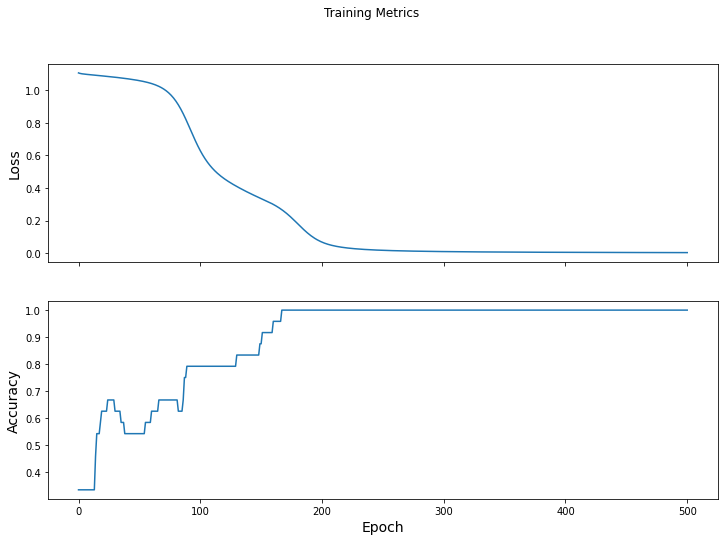

In [ ]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
predictions = model(features)
print(features)
print(predictions)
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

tf.Tensor(
[[0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]
 [0.5 0.6]
 [0.4 0.8]], shape=(6, 2), dtype=float32)
tf.Tensor(
[[ 13.637103     2.4215794  -18.287455  ]
 [ -6.4623003    9.024446     0.24042508]
 [ -3.5413132    6.849278    -5.3525167 ]
 [  8.055306   -13.115219     3.282387  ]
 [ -3.2234213   -0.96314496   4.2038975 ]
 [ -2.8873997   -0.87110275   4.1235    ]], shape=(6, 3), dtype=float32)
Prediction: [0 1 1 0 2 2]
    Labels: [0 1 1 0 2 2]


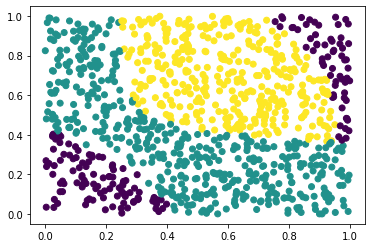

In [ ]:
features_test=tf.random.uniform(shape=[1000,2])
# print(features_test)
predictions = model(features_test)
# print(predictions)
# print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
plt.scatter(features_test.numpy()[:,0],features_test.numpy()[:,1],
            c=tf.argmax(predictions, axis=1))

In [ ]:
print(model.weights)
print(model.get_weights)
pesos=model.get_weights


[<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.6770805 ,  3.555251  ],
       [ 3.4297068 , -0.01368477]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-1.757869 , -1.1374695], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-1.2615725 ,  0.69329137,  0.25178385,  0.89105314, -0.53825814,
        -0.49258628, -2.3461003 , -1.9656953 ,  1.4904279 , -0.92044216],
       [-1.232882  , -2.4294884 ,  0.14340562,  0.4562786 , -0.35636535,
        -0.79179066,  1.0984371 , -1.6686467 ,  1.6964715 , -0.35247552]],
      dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.12415702, -0.17919604, -0.11736689, -0.9229583 , -0.36804715,
       -0.31338865,  0.21912426,  0.18146092, -1.4254557 , -0.36076298],
      dtype=float32)>, <tf.Variable 'dense_2/kernel:0' shape=(10, 3) dtype=float32, numpy=
array([[ 1.6108873 , -0.14271854, -0.64528537],
   

In [ ]:
from time import time
import tensorflow as tf

def time_matmul(x):
  start = time()
  for loop in range(1000):
    tf.matmul(x, x)

  result = time()-start

  print("1000 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

  # print(time()-start)

On CPU:
1000 loops: 36226.84ms
On GPU:
1000 loops: 2113.84ms


NameError: ignored